In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import folium

In [10]:
import osmnx as ox
import networkx as nx
import folium
import pandas as pd


# Coordenadas do Campus Samambaia da UFG
campus_coords = (-16.603422, -49.265381)  # Latitude e longitude aproximadas

# Definir o raio em metros
radius = 2000  # 2 km

# Coletar o grafo de ruas dentro do raio especificado
G = ox.graph_from_point(campus_coords, dist=radius, network_type='drive')


# Extrair nós e arestas
nodes, edges = ox.graph_to_gdfs(G)

print(G)

MultiDiGraph with 879 nodes and 2155 edges


In [12]:
#Visualizar os vertices
nodes.head()    


,y,x,street_count,highway,geometry
osmid,,,,,
10878511695,-16.616643,-49.248037,3,NaN,POINT (-49.24804 -16.61664)
10878511696,-16.616600,-49.247935,3,NaN,POINT (-49.24793 -16.6166)
10878511697,-16.616723,-49.247894,3,NaN,POINT (-49.24789 -16.61672)
10878553856,-16.614082,-49.250646,4,NaN,POINT (-49.25065 -16.61408)
10893673837,-16.620556,-49.259210,1,NaN,POINT (-49.25921 -16.62056)
10893673838,-16.621345,-49.258874,3,NaN,POINT (-49.25887 -16.62135)
10893710697,-16.613989,-49.246723,3,NaN,POINT (-49.24672 -16.61399)
10893710698,-16.614074,-49.246712,3,NaN,POINT (-49.24671 -16.61407)
10896045221,-16.592098,-49.265117,3,NaN,POINT (-49.26512 -16.5921)


In [5]:
#Visualizar as arestas
edges.head()

osmid  \
u         v          key                           
340270144 3095000770 0                 304930948   
          4033851168 0                 465225861   
          3677117783 0                 923759035   
340270148 8540152564 0    [279248147, 279248148]   
          4824435322 0                 490268036   

                                                  name      highway  oneway  \
u         v          key                                                      
340270144 3095000770 0    Rua Maria Josefina Vaiandeli  residential   False   
          4033851168 0               Avenida Nerópolis      primary   False   
          3677117783 0               Avenida Nerópolis      primary   False   
340270148 8540152564 0           [Rua 2, Rua Finlâdia]     tertiary   False   
          4824435322 0                             NaN      primary    True   

                         reversed   length  \
u         v          key                     
340270144 3095000770 0      False   77.840   
          4033851168 0      False   60.101   
          3677117783 0       True  159.108   
340270148 8540152564 0      False  831.756   
          4824435322 0      False    8.524   

                                                                   geometry  \
u         v          key                                                      
340270144 3095000770 0    LINESTRING (-49.28369 -16.61871, -49.28298 -16...   
          4033851168 0    LINESTRING (-49.28369 -16.61871, -49.28372 -16...   
          3677117783 0    LINESTRING (-49.28369 -16.61871, -49.28367 -16...   
340270148 8540152564 0    LINESTRING (-49.28056 -16.60347, -49.28056 -16...   
          4824435322 0    LINESTRING (-49.28056 -16.60347, -49.28053 -16...   

                            junction  ref maxspeed lanes bridge  
u         v          key                                         
340270144 3095000770 0           NaN  NaN      NaN   NaN    NaN  
          4033851168 0           NaN  NaN      NaN   NaN    NaN  
          3677117783 0           NaN  NaN      NaN   NaN    NaN  
340270148 8540152564 0           NaN  NaN      NaN   NaN    NaN  
          4824435322 0    roundabout  NaN      NaN   NaN    NaN

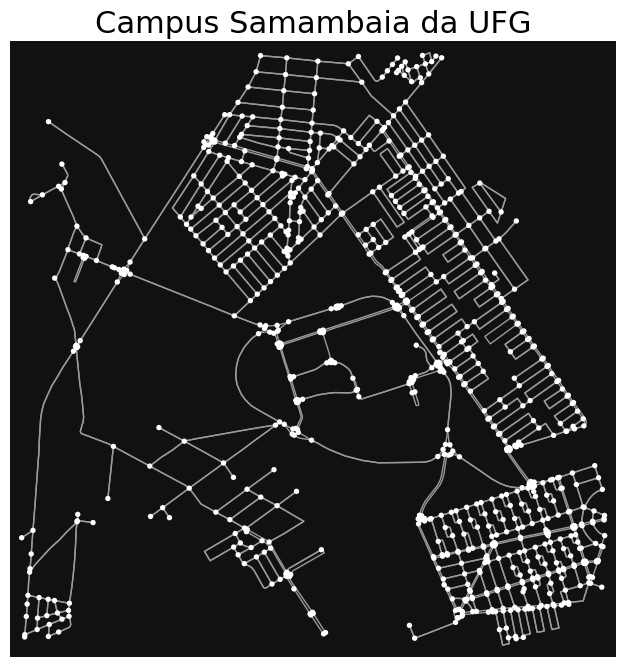

In [9]:
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(G,show=False, close=False,)
ax.set_title('Campus Samambaia da UFG', fontsize=22, color='k')
plt.show()

In [14]:
# Centro do mapa baseado no ponto central definido
center = campus_coords

# Criar o mapa com folium usando tiles leves
m = folium.Map(location=center, zoom_start=14, tiles='cartodbpositron')

# Adicionar arestas ao mapa de forma eficiente
for _, row in edges.iterrows():
    points = [(lat, lon) for lat, lon in zip(row['geometry'].xy[1], row['geometry'].xy[0])]
    folium.PolyLine(points, color='blue', weight=1.0, opacity=0.6).add_to(m) 

# Adicionar vertices ao mapa de forma eficiente
for _, row in nodes.iterrows():
    folium.CircleMarker(location=(row['y'], row['x']), radius=1, color='red', fill=True).add_to(m)

# Visualização do mapa, que já foi mostrada anteriormente
m.save('map_optimized_campus.html')


**#Navegue até a pasta onde o arquivo html se encontra e abra ele no navegador para visualização**

In [15]:
# Função para encontrar a rota mais curta
def find_approx_route(G, orig, dest):
    # Use um algoritmo de busca aproximada se necessário
    return nx.shortest_path(G, orig, dest, weight='length')

# Definir os nós de origem e destino
#print(G.nodes())
orig_node = list(G.nodes())[0]
dest_node = list(G.nodes())[-1]

# Encontrar a rota mais curta, G = Mapa da Ufg mapeado, orig_node = id do primeiro nó na lista G, dest_node = id do último nó na lista G
#Retorna uma lista indicando o id da sequência de nós que compõem a rota mais curta
shortest_route = find_approx_route(G, orig_node, dest_node)

# Extrair coordenadas da rota mais curta, pega a latitude e longitude de cada um dos vertices na rota mais curta
route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_route]
print(route_coords)

# Adicionar a rota mais curta ao mapa
folium.PolyLine(route_coords, color='green', weight=2.5, opacity=0.8).add_to(m)

# Mostrar o mapa com a rota
m.save('map_with_approx_route_campus.html')

[(-16.6187095, -49.2836926), (-16.6172826, -49.2835857), (-16.6170686, -49.2835605), (-16.6161637, -49.2834838), (-16.6147148, -49.2833702), (-16.603694, -49.2807726), (-16.6034676, -49.2805799), (-16.6034688, -49.2805606), (-16.6095495, -49.2782076), (-16.6107607, -49.2758743), (-16.6121187, -49.2733412), (-16.6133193, -49.2750465)]
